In [2]:
import numpy as np 
import pandas as pd
import os
os.chdir("C:/Users/sudarshan/FYP/Data")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

crypto = pd.read_csv('CryptocoinsHistoricalPrices.csv')
crypto.head()


crypto.info()
crypto.describe()

crypto.columns

crypto.drop(['Unnamed: 0'], axis=1, inplace=True)

crypto.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659360 entries, 0 to 659359
Data columns (total 10 columns):
Unnamed: 0    659360 non-null int64
Date          659359 non-null object
Open          658997 non-null float64
High          658974 non-null float64
Low           659025 non-null float64
Close         658997 non-null float64
Volume        659360 non-null object
Market.Cap    659360 non-null object
coin          659360 non-null object
Delta         658981 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 50.3+ MB


,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,2018-01-09,15123.7,15497.5,14424.0,14595.4,"16,660,000,000","253,935,000,000",BTC,-0.034932
1,2018-01-08,16476.2,16537.9,14208.2,15170.1,"18,413,900,000","276,612,000,000",BTC,-0.079272
2,2018-01-07,17527.3,17579.6,16087.7,16477.6,"15,866,000,000","294,222,000,000",BTC,-0.059889
3,2018-01-06,17462.1,17712.4,16764.6,17527.0,"18,314,600,000","293,091,000,000",BTC,0.003717
4,2018-01-05,15477.2,17705.2,15202.8,17429.5,"23,840,900,000","259,748,000,000",BTC,0.126140


In [3]:
crypto.dropna(axis=0, inplace=True)
crypto['Year']=crypto['Date'].apply(lambda x: x.split('-')[0])

In [4]:
df= crypto[crypto['Market.Cap']!='-']

In [5]:
#removing , from market cap data

In [6]:
df['Market.Cap'] = df['Market.Cap'].str.replace(',', '')
df['Market.Cap']=df['Market.Cap'].astype(float)

C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
#using data from 2017 year

In [8]:
df= df[df['Year']=='2017']

In [9]:
#checking most prominent currencies by checking market cap
temp_df= df.sort_values('Market.Cap', ascending=False)
temp_df = temp_df.head(25000)

#we took 10% of the top market values to pick up are favourite cryptos here, 
#strange to see BTC is lower to LTC and XRP

In [10]:
coins_type=temp_df.groupby('coin').count().sort_values(by='Volume',ascending=False).head(10)

In [11]:
coins_type

,Date,Open,High,Low,Close,Volume,Market.Cap,Delta,Year
coin,,,,,,,,,
LTC,365,365,365,365,365,365,365,365,365
XRP,365,365,365,365,365,365,365,365,365
BTC,365,365,365,365,365,365,365,365,365
DASH,365,365,365,365,365,365,365,365,365
ETH,365,365,365,365,365,365,365,365,365
ETC,365,365,365,365,365,365,365,365,365
REP,365,365,365,365,365,365,365,365,365
XMR,365,365,365,365,365,365,365,365,365
MAID,365,365,365,365,365,365,365,365,365


In [12]:
top_coins_name=list(coins_type.index)

In [13]:
df_top = df[df['coin'].isin(top_coins_name)]

In [14]:
df_top.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Year
9,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000",2.163260e+11,BTC,0.097591,2017
10,2017-12-30,14681.9,14681.9,12350.1,12952.2,"14,452,600,000",2.462240e+11,BTC,-0.117812,2017
11,2017-12-29,14695.8,15279.0,14307.0,14656.2,"13,025,500,000",2.464280e+11,BTC,-0.002695,2017
12,2017-12-28,15864.1,15888.4,13937.3,14606.5,"12,336,500,000",2.659880e+11,BTC,-0.079273,2017
13,2017-12-27,16163.5,16930.9,15114.3,15838.5,"12,487,600,000",2.709760e+11,BTC,-0.020107,2017


In [15]:
df_top['Month']=df_top['Date'].apply(lambda x: x.split('-')[1])

C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_top.head()
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 9 to 40477
Data columns (total 11 columns):
Date          3650 non-null object
Open          3650 non-null float64
High          3650 non-null float64
Low           3650 non-null float64
Close         3650 non-null float64
Volume        3650 non-null object
Market.Cap    3650 non-null float64
coin          3650 non-null object
Delta         3650 non-null float64
Year          3650 non-null object
Month         3650 non-null object
dtypes: float64(6), object(5)
memory usage: 342.2+ KB


In [17]:
#Volume comparison
df_top['Volume'] = df_top['Volume'].str.replace(',', '')
df_top['Volume']=df_top['Volume'].astype(float)


C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


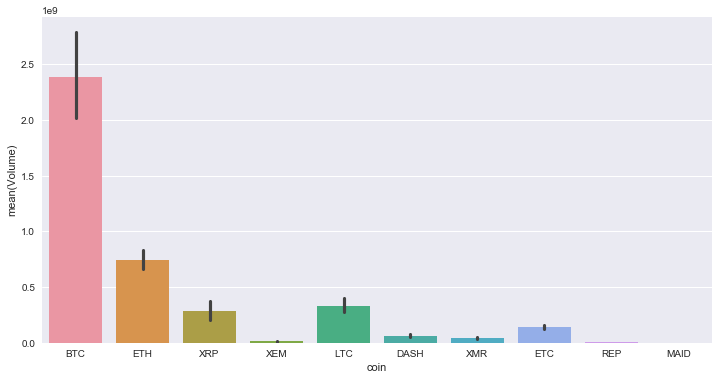

In [18]:
#barplot
plt.figure(figsize=(12,6))
sns.barplot(x='coin', y='Volume', data=df_top, estimator=np.mean)

In [19]:
#BTC has most volume followed by ETH, LTC, XRP and small chunks on ETC, DASH, XMR, XEM

In [20]:
#line chart for openining values of bitcoin

In [84]:
rip_table = df_btc = df[df['coin']=='REP']

In [85]:
#checking correlation for picking up dependent and independent variables
rip_table.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Year
25382,2017-12-31,64.74,71.39,63.76,70.07,"5,779,320",712114000.0,REP,0.082329,2017
25383,2017-12-30,76.20,76.20,62.46,65.83,"11,058,300",838231000.0,REP,-0.136089,2017
25384,2017-12-29,74.35,78.12,71.32,76.52,"12,299,500",817845000.0,REP,0.029186,2017
25385,2017-12-28,80.23,80.23,67.27,74.24,"11,699,200",882535000.0,REP,-0.074660,2017
25386,2017-12-27,85.59,85.59,76.63,80.54,"14,184,900",941539000.0,REP,-0.059002,2017


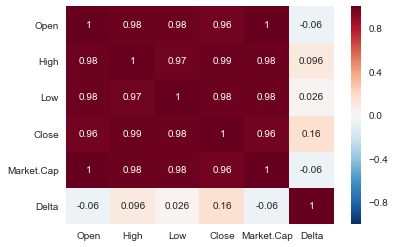

In [86]:
#for ripple
sns.heatmap(rip_table.corr(),annot=True)

In [87]:
#delta is not correlated much with "close". Close will be our dependent variable ie y 

In [88]:
rip_table.info()
#We will remove the columns of object type and delta, since they are not much relevant.
#Also, we will remove high and low, since they are determing the outcome

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 25382 to 25746
Data columns (total 10 columns):
Date          365 non-null object
Open          365 non-null float64
High          365 non-null float64
Low           365 non-null float64
Close         365 non-null float64
Volume        365 non-null object
Market.Cap    365 non-null float64
coin          365 non-null object
Delta         365 non-null float64
Year          365 non-null object
dtypes: float64(6), object(4)
memory usage: 31.4+ KB


In [89]:
rip_table.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market.Cap', 'coin',
       'Delta', 'Year'],
      dtype='object')

In [91]:
rip_table['Volume']=rip_table['Volume'].str.replace(',','')
rip_table['Volume']=rip_table['Volume']
rip_table.head()

C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Year
25382,2017-12-31,64.74,71.39,63.76,70.07,5779320,712114000.0,REP,0.082329,2017
25383,2017-12-30,76.20,76.20,62.46,65.83,11058300,838231000.0,REP,-0.136089,2017
25384,2017-12-29,74.35,78.12,71.32,76.52,12299500,817845000.0,REP,0.029186,2017
25385,2017-12-28,80.23,80.23,67.27,74.24,11699200,882535000.0,REP,-0.074660,2017
25386,2017-12-27,85.59,85.59,76.63,80.54,14184900,941539000.0,REP,-0.059002,2017


In [92]:
#linear model for ripple
X=rip_table[['Open', 'High', 'Low', 'Volume', 'Market.Cap']]
y=rip_table['Close']

In [93]:
#training set

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_test.head()

#random_state-> same random splits

,Open,High,Low,Volume,Market.Cap
25699,4.94,5.13,4.91,144989,54372800.0
25477,18.79,21.21,18.68,1632240,206643000.0
25592,26.18,28.97,26.00,4559000,288020000.0
25571,29.23,31.29,26.69,3650130,321495000.0
25688,4.81,4.86,4.43,277464,52962500.0


In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm=LinearRegression()

In [98]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
print(lm.intercept_) #coefficients

-0.183834559592


In [100]:
lm.coef_

array([  2.46945506e+00,   4.47355753e-01,   8.55094861e-01,
         3.36079694e-08,  -2.49224372e-07])

In [101]:
X_train.columns

Index(['Open', 'High', 'Low', 'Volume', 'Market.Cap'], dtype='object')

In [102]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf
#market cap is not playing a deciding factor here

,Coeff
Open,2.469455e+00
High,4.473558e-01
Low,8.550949e-01
Volume,3.360797e-08
Market.Cap,-2.492244e-07


In [103]:
predictions=lm.predict(X_test)

In [104]:
predictions

array([  4.96257008,  20.23319795,  28.03047662,  28.81686423,
         4.46624268,  21.91317066,  18.16089956,  35.0753834 ,
        27.14188077,   3.71390681,  17.74875683,   4.69924748,
        24.18367099,  10.29180047,  74.25018635,  10.53883965,
        17.92919716,   5.32379816,   4.1984525 ,  17.57100365,
         8.57943406,  22.88058976,   4.39792566,  80.81418198,
         4.28191773,   4.67471186,  30.58003587,  22.79474281,
        17.28713847,   4.16627139,  17.81127069,  12.71931955,
        30.25670217,   9.89039529,  23.00085436,  23.86014033,
         9.8456778 ,  16.51781009,  16.2501639 ,  20.84576792,
         4.14602008,  34.27166817,   4.09124931,  41.51576714,
         4.1159903 ,  49.31811483,  20.57483142,  22.0360632 ,
         3.71464471,  24.10929999,  34.4163736 ,   4.11003563,
        20.89787425,  37.17428395,  16.56708188,  19.52641976,
        30.9568391 ,   8.55309825,   4.76389264,  33.72878578,
        18.67778535,  17.98680162,  11.13989459,   5.37

In [105]:
y_test.head()

25699     4.92
25477    20.98
25592    28.96
25571    27.99
25688     4.54
Name: Close, dtype: float64

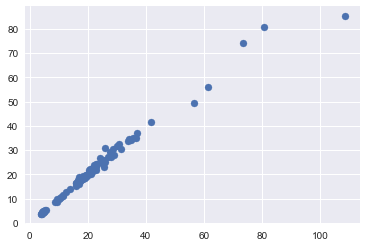

In [106]:
plt.scatter(y_test, predictions)

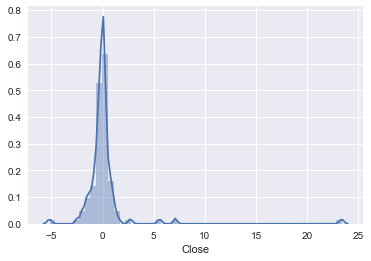

In [107]:
sns.distplot((y_test- predictions))

In [108]:
#we see it shows a linear trend and distribution is uniform with few outliers and since price is low , we cant be very sure whether it can be used as a good predictive model

In [109]:
#Deciding factors- High, Low and Market Cap

In [115]:
#lets repeat the same process for bitcoin
btc_table = df[df['coin']=='BTC']
btc_table['Volume']=btc_table['Volume'].str.replace(',','')


btc_table.head()

C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,Year
9,2017-12-31,12897.7,14377.4,12755.6,14156.4,12136300000,2.163260e+11,BTC,0.097591,2017
10,2017-12-30,14681.9,14681.9,12350.1,12952.2,14452600000,2.462240e+11,BTC,-0.117812,2017
11,2017-12-29,14695.8,15279.0,14307.0,14656.2,13025500000,2.464280e+11,BTC,-0.002695,2017
12,2017-12-28,15864.1,15888.4,13937.3,14606.5,12336500000,2.659880e+11,BTC,-0.079273,2017
13,2017-12-27,16163.5,16930.9,15114.3,15838.5,12487600000,2.709760e+11,BTC,-0.020107,2017


In [116]:
X=btc_table[['Open','High', 'Low', 'Volume', 'Market.Cap']]
y=btc_table['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [117]:
lm=LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_) 
lm.coef_

-23.7838239123


array([ -1.18414454e-02,   1.10134285e+00,   3.31236371e-01,
        -4.28836094e-08,  -2.49649184e-08])

In [118]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf

,Coeff
Open,-1.184145e-02
High,1.101343e+00
Low,3.312364e-01
Volume,-4.288361e-08
Market.Cap,-2.496492e-08


In [119]:
predictions=lm.predict(X_test)
predictions

array([  1043.68544111,   4169.06630706,   2507.01431573,   2626.89916294,
         1179.46045509,   2371.90174217,   6602.35383393,   2762.02238311,
         2566.79370731,    852.53274143,   5873.69311864,   1106.8059197 ,
         3398.19893727,   1186.12197073,  15179.44297436,   1171.64665483,
         2067.94291338,   1184.9532491 ,    912.81771924,   7524.56038098,
          983.01688663,   2451.35340836,    884.92425207,  16137.54136336,
          891.60796823,    999.19325188,   2651.41545254,   4386.23628132,
         1676.28735918,    912.52030428,   2329.73567515,   1070.22051828,
         2758.22223674,   1167.46623429,   3881.06930822,   2604.01518029,
         1162.30921271,   1748.59698065,   1870.67751344,   4338.68841368,
          910.35968772,  16655.31739224,    968.44297628,  19312.12897165,
          962.86433205,  18539.07755297,   4078.39028271,   3929.79292146,
          994.02267063,   2875.27006498,  17153.6310341 ,    807.80678833,
         2830.2732828 ,  

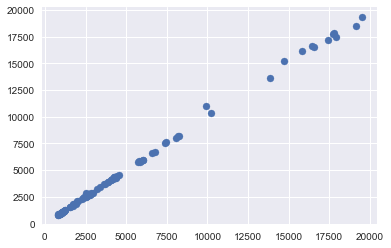

In [120]:
plt.scatter(y_test, predictions)

In [121]:
#here cdf we got to know that High and low values is major factor in determing the daily closing price for bitcoin

In [122]:
#Conclusion from linear model, linear model is able to atleast tell us the important factors in prediciting major cryptos as well as 
#able to tell whether for a particular day, price should go up or down except for few cases, it looks very promising here though

In [124]:
#linear model for ltc
ltc_table = df[df['coin']=='LTC']
ltc_table['Volume']=ltc_table['Volume'].str.replace(',','')
X=ltc_table[['Open', 'High', 'Low', 'Volume', 'Market.Cap']]
y=ltc_table['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm=LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_) 
lm.coef_

0.265560349858


C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ -2.57081644e-01,   8.81936160e-01,   4.85465706e-01,
        -9.10304915e-10,  -2.32796971e-09])

In [125]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf

,Coeff
Open,-2.570816e-01
High,8.819362e-01
Low,4.854657e-01
Volume,-9.103049e-10
Market.Cap,-2.327970e-09


In [126]:
predictions=lm.predict(X_test)
predictions

array([   4.06880543,   55.33248957,   27.38707829,   44.81305003,
          4.03677232,   46.93224402,   61.34340167,   29.65417205,
         52.64531056,    4.47271127,   55.3238779 ,    4.03489799,
         47.29871905,   10.85134463,  298.46529062,   10.38025573,
         27.66881455,    4.06623651,    4.09735847,   54.61574379,
          4.31145391,   38.30143669,    4.13873659,  274.48673522,
          3.99091355,    4.00106712,   30.31588493,   71.25855659,
         29.11003501,    4.2383178 ,   42.13157004,    6.94154081,
         30.20195854,   10.37020788,   46.76894263,   51.16605648,
         10.12412287,   27.05561882,   28.4726554 ,   53.85700391,
          4.08500689,  317.24911162,    3.99789989,  298.44095569,
          4.32168388,  341.04817891,   46.58431942,   60.93343917,
          4.73535599,   47.70744207,  315.63818493,    4.12707816,
         46.16524443,  286.37267643,   54.17406413,   52.15483825,
         74.23390392,    4.22251356,    4.06170627,   30.27091

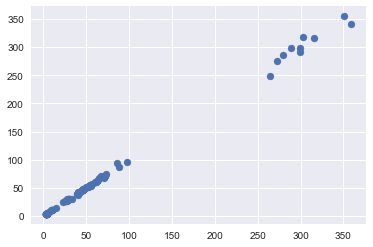

In [127]:
plt.scatter(y_test, predictions)

In [128]:
#ltc's closing price is dependent on high and low similar to what we observed in bitcoin

In [129]:
#linear model for etc
etc_table = df[df['coin']=='ETC']
etc_table['Volume']=etc_table['Volume'].str.replace(',','')
X=etc_table[['Open', 'High', 'Low', 'Volume', 'Market.Cap']]
y=etc_table['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm=LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_) 
lm.coef_

#So Cryptos for 2018- looki out for Ripple, LTC, DASH, ETC

-0.00922095703568


C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ -6.02584419e-01,   8.38759714e-01,   7.50616839e-01,
         8.02927724e-11,   1.25329636e-10])

In [130]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf

,Coeff
Open,-6.025844e-01
High,8.387597e-01
Low,7.506168e-01
Volume,8.029277e-11
Market.Cap,1.253296e-10


In [131]:
#dependent on high, low, volume and market.cap

In [132]:
predictions=lm.predict(X_test)
predictions

array([  1.23512395,  12.56170981,  17.1277281 ,  22.73702252,
         1.23761226,  18.58814215,  15.81539993,  17.43591826,
        17.52249904,   1.22450601,  10.40238373,   1.22604059,
        15.3662756 ,   2.61201985,  34.24658806,   2.61503307,
         9.04431381,   1.30433826,   1.28895614,  13.80812753,
         2.35070835,  17.79247281,   1.34405096,  31.95925485,
         1.30380584,   1.22279638,  16.9994184 ,  15.67080404,
         6.68615231,   1.32246725,  15.02956053,   2.7533676 ,
        20.03568833,   2.68648761,  14.92257263,  16.80941387,
         2.63234123,   6.45773956,   6.58609979,  12.72156735,
         1.2973003 ,  31.02718734,   1.22166923,  37.39638135,
         1.34812251,  39.48779387,  13.95630398,  13.84560848,
         1.42836631,  17.14394938,  32.26487103,   1.20178458,
        16.43969093,  33.34857385,  10.16412567,  11.94067434,
        18.44982947,   2.27259633,   1.23168929,  19.26679966,
        11.50778967,  11.36125409,   2.64472734,   1.29

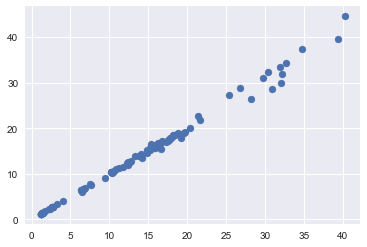

In [133]:
plt.scatter(y_test, predictions)

In [134]:
#etc also fits in linear model nicely with few outcomes going against them

In [135]:
#linear model for dash
dash_table = df[df['coin']=='DASH']
dash_table['Volume']=dash_table['Volume'].str.replace(',','')
X=dash_table[['Open', 'High', 'Low', 'Volume', 'Market.Cap']]
y=dash_table['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm=LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_) 
lm.coef_
#So Cryptos for 2018- looki out for Ripple, LTC, DASH, ETC

1.01149673141


C:\Users\sudarshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ -6.06754482e-01,   8.66507073e-01,   5.85946986e-01,
        -3.07770231e-08,   1.95894974e-08])

In [136]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf 

,Coeff
Open,-6.067545e-01
High,8.665071e-01
Low,5.859470e-01
Volume,-3.077702e-08
Market.Cap,1.958950e-08


In [137]:
#dependent on high, low and market cap

In [138]:
predictions=lm.predict(X_test)
predictions

array([   20.55572751,   343.97765997,   140.48559212,   173.7740017 ,
          32.81276217,   174.89165053,   456.61419237,   143.26655478,
         203.98036212,    12.5010599 ,   283.27298305,    21.92232447,
         201.04394849,    66.0916449 ,  1306.7810761 ,    70.64479712,
          99.82200187,    51.31282961,    16.26998453,   272.91020583,
          92.94743843,   166.96384382,    15.95369169,  1205.93484153,
          15.15614908,    18.83277742,   142.98123086,   346.72509927,
          99.4378558 ,    16.65933896,   164.97616702,    69.41835736,
         177.95384343,    68.01540012,   205.72444986,   201.64907407,
          67.8607408 ,    88.04396566,    88.56135952,   319.25114386,
          16.05083836,   853.99586819,    17.12866377,   978.6641737 ,
          16.80805448,  1135.88008556,   317.38752908,   301.23287642,
          12.00938408,   199.76704112,   900.78766052,    12.73341391,
         192.65483448,   937.78371039,   280.48649985,   298.26726212,
      

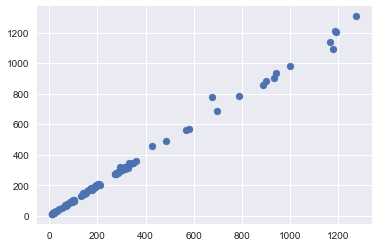

In [139]:
plt.scatter(y_test, predictions)

In [140]:
#for such high prices dash is quite predictable and stable at the same time, we should surely look for it. It fits linear model pretty well

In [141]:
#Keep an eye on Dash, etc and Ripple where close price is pretty much predictable and based on Low, High and Market.Cap
#for Ltc, the predicition is mostly based on Low and High only 

In [142]:
#But all of them show promising future this year in terms of values and interest of people